In [1]:

import warnings

# Suppress the warning
warnings.filterwarnings("ignore", category=Warning)

In [2]:
###2. create non-reduced dataset - fill in 1s for none values in the index column (and also average for other demo columns)
from functions.N_fctn_load_excel import load_excel_to_dataframe
daf = load_excel_to_dataframe('MAIN_DATA.xlsx')

In [3]:

from functions.Q_fction_get_summary_statistics import get_summary_statistics

summary1 = get_summary_statistics(daf)
print(summary1)

                                           count  unique                mode  \
profile                                     7728    7728               Detek   
link                                        7728       2                 0.0   
experience                                  7728    1110                 0.0   
contributions                               7728     114                 0.0   
comments                                    7728     741                 0.0   
artifacts                                   7728     295                 1.0   
coins                                       7728     180                 0.0   
residence_additional_info                   7728       2                 0.0   
municipality                                4230     899               Praha   
municipal_office                            4216     355  Hlavní město Praha   
real_net_monetary_index                     4216     355            1.131666   
submitted_number_artifs                 

In [4]:
from functions.Q_fction_get_summary_statistics import get_extended_summary_statistics

summary1_ext = get_extended_summary_statistics(daf)
print(summary1_ext)

                                            count    mean      std    min  \
link                                       7728.0    0.03     0.16   0.00   
experience                                 7728.0  833.84  8855.30   0.00   
contributions                              7728.0    2.69    22.45   0.00   
comments                                   7728.0  147.39   839.08   0.00   
artifacts                                  7728.0   20.79    72.76   0.00   
coins                                      7728.0    9.72    27.72   0.00   
residence_additional_info                  7728.0    0.01     0.10   0.00   
real_net_monetary_index                    4216.0    1.00     0.07   0.77   
submitted_number_artifs                    6677.0    0.48     3.56   0.00   
number_artifs                              6677.0   24.01    77.78   1.00   
artifs_rate                                6677.0    0.01     0.08   0.00   
submitted_number_coins                     5323.0    0.08     0.97   0.00   

In [5]:
#we fill-in the values...:
from functions.P_fctn_fill_missing_values import fill_missing_values

daf_non_reduced = fill_missing_values(daf,{'real_net_monetary_index':1, 
                                           'average_age':42.4734915211329, 
                                           'men_proportion':0.497149745062897, 
                                           '65+_proportion':0.197914581620951, 
                                           'localities_rate': 0.021478453745227236, 
                                           'population_density': 135, 
                                           'area_municipality':12.603110956375838     })
daf_non_reduced = fill_missing_values(daf_non_reduced, {'artifs_rate':0, 'coins_rate':0, 'rate_artifs_dummy':0, 'rate_coins_dummy':0}) 
#print(daf_non_reduced)

from functions.R_fctn_subset_dataframe import subset_dataframe
from functions.N_fctn_subset_non_none import subset_non_none_values
from functions.B_fctn_drop_columns import drop_columns
daf_non_reduced_with_none_being_zero = daf_non_reduced.copy()
daf_non_reduced_with_none_being_zero = drop_columns(daf_non_reduced_with_none_being_zero, ['number_artifs','submitted_number_artifs', 'number_coins', 'submitted_number_coins'],)


daf_non_reduced_with_none_being_zero = subset_dataframe(daf_non_reduced_with_none_being_zero, 'uploaded_at_least_one_artif_or_coin_dummy') #DATASET 1., we have a considerable 7622 rows


#print(daf_non_reduced_with_none_being_zero)

daf_non_reduced_copy_2 = daf_non_reduced.copy()
daf_non_reduced_copy_3 = daf_non_reduced.copy()



#daf_non_reduced_with_artif_none_deleted = subset_non_none_values(daf_non_reduced_copy_2, 'number_artifs') #using 'number_artifs' since artifs rate is imprecise---includes 0s even if one have 0 artifacts sometimess, the same for coins:
daf_non_reduced_with_coin_none_deleted = subset_non_none_values(daf_non_reduced_copy_3, 'number_coins') ####DATASET 2.


In [6]:

from functions.F_fctn_save_df_to_excel import save_dataframe_to_excel

save_dataframe_to_excel(daf_non_reduced_with_coin_none_deleted, 'df_nonreduced_coins.xlsx')


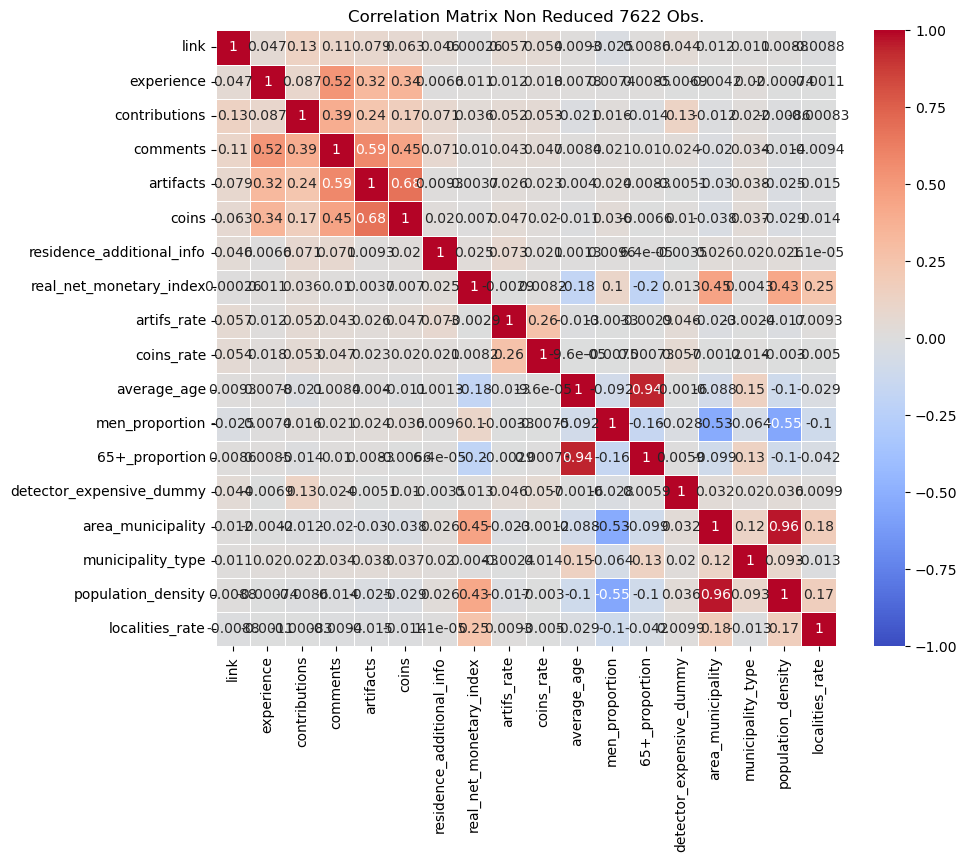

In [7]:
#1. ! correlation matrix:
from functions.Q_fctn_create_correlation_matrix import create_correlation_matrix



create_correlation_matrix(daf_non_reduced_with_none_being_zero,['link',                                        
'experience',                                  
'contributions',                               
'comments',                                    
'artifacts',                                   
'coins',                                       
'residence_additional_info','real_net_monetary_index',                     
'artifs_rate',                                 
'coins_rate',                                  
'average_age',   
'men_proportion',                              
'65+_proportion',                              
'detector_expensive_dummy',                    
'area_municipality',                           
'municipality_type',                           
'population_density',                         
'localities_rate'],'Correlation Matrix Non Reduced 7622 Obs.')



In [8]:

#from the correlation matrix we chose 10 variables with the strongest correlation to rates and that are subject to the main hypothesis:

daf_non_reduced_with_none_being_zero = drop_columns(daf_non_reduced_with_none_being_zero, ['area_municipality',                           
'municipality_type',                           
'population_density',
'average_age',                            
'uploaded_at_least_one_artif_or_coin_dummy',   
'men_proportion',                              
'65+_proportion'])


In [9]:
#2. summary statistics:
from functions.Q_fction_get_summary_statistics import get_summary_statistics
summary_non_reduced_1 = get_summary_statistics(daf_non_reduced_with_none_being_zero)
print(summary_non_reduced_1 )


                           count  unique                mode  frequency
profile                     7622    7622               Detek          1
link                        7622       2                 0.0       7422
experience                  7622    1097                 0.0       3064
contributions               7622     113                 0.0       6190
comments                    7622     737                 0.0        847
artifacts                   7622     294                 1.0       1534
coins                       7622     180                 0.0       2289
residence_additional_info   7622       2                 0.0       7538
municipality                4174     893               Praha        363
municipal_office            4160     354  Hlavní město Praha        408
real_net_monetary_index     7622     355                 1.0       3462
artifs_rate                 7622     302                 0.0       7056
coins_rate                  7622      90                 0.0    

In [10]:
from functions.Q_fction_get_summary_statistics import get_extended_summary_statistics
summary_non_reduced_1_ext = get_extended_summary_statistics(daf_non_reduced_with_none_being_zero)
print(summary_non_reduced_1_ext)


                            count    mean      std   min   25%    50%    75%  \
link                       7622.0    0.03     0.16  0.00  0.00   0.00   0.00   
experience                 7622.0  829.90  8892.82  0.00  0.00  10.00  78.00   
contributions              7622.0    2.66    22.37  0.00  0.00   0.00   0.00   
comments                   7622.0  144.77   798.35  0.00  2.00   9.00  38.00   
artifacts                  7622.0   21.05    73.18  0.00  1.00   4.00  14.00   
coins                      7622.0    9.85    27.88  0.00  0.00   2.00   7.00   
residence_additional_info  7622.0    0.01     0.10  0.00  0.00   0.00   0.00   
real_net_monetary_index    7622.0    1.00     0.05  0.77  0.97   1.00   1.00   
artifs_rate                7622.0    0.01     0.08  0.00  0.00   0.00   0.00   
coins_rate                 7622.0    0.00     0.04  0.00  0.00   0.00   0.00   
rate_artifs_dummy          7622.0    0.07     0.26  0.00  0.00   0.00   0.00   
rate_coins_dummy           7622.0    0.0

In [11]:


from functions.E_fctn_display_unique_values import display_unique_values

print(display_unique_values(daf_non_reduced_with_none_being_zero, 'municipal_office'))


                     Value  Count
0       Hlavní město Praha    408
1                     Brno    207
2                    Plzeň    114
3                  Olomouc     86
4         České Budějovice     76
..                     ...    ...
349                Hranice      1
350     Teplice nad Metují      1
351                  Hulín      1
352                 Kouřim      1
353  Rokytnice nad Jizerou      1

[354 rows x 2 columns]


In [12]:

import numpy as np
df_log = daf_non_reduced_with_none_being_zero[['artifs_rate', 'experience','contributions',               
'comments',                    
'artifacts',                   
'coins',                                      
'real_net_monetary_index',                 
'coins_rate',                    
'localities_rate','rate_artifs_dummy',                           
'rate_coins_dummy', 'link', 'residence_additional_info', 'detector_expensive_dummy']]


df_log['log_experience'] = np.log(df_log['experience'].values + 1)
df_log['log_contributions'] = np.log(df_log['contributions'].values + 1)
df_log['log_comments'] = np.log(df_log['comments'].values + 1)
df_log['log_artifacts'] = np.log(df_log['artifacts'].values + 1)
df_log['log_artifs_rate'] = np.log(df_log['artifs_rate'].values + 1)
df_log['log_coins'] = np.log(df_log['coins'].values + 1)
df_log['log_coins_rate'] = np.log(df_log['coins_rate'].values + 1)
df_log['log_localities_rate'] = np.log(df_log['localities_rate'].values + 1)
#print(df_log)

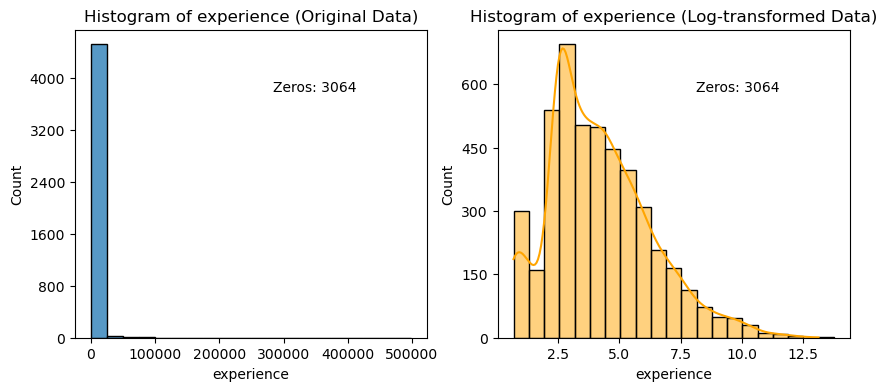

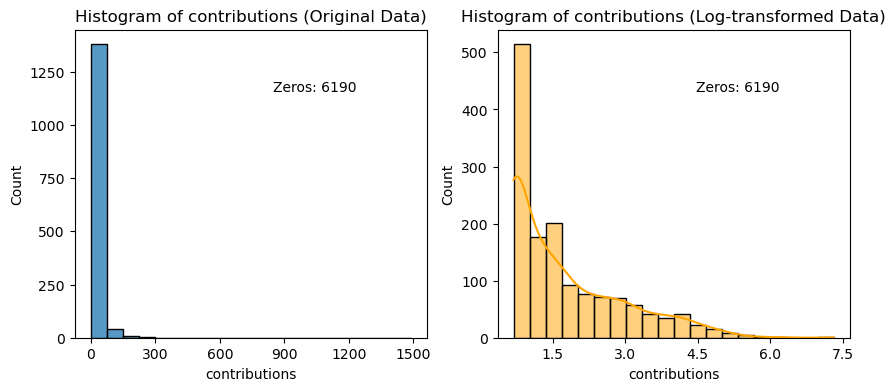

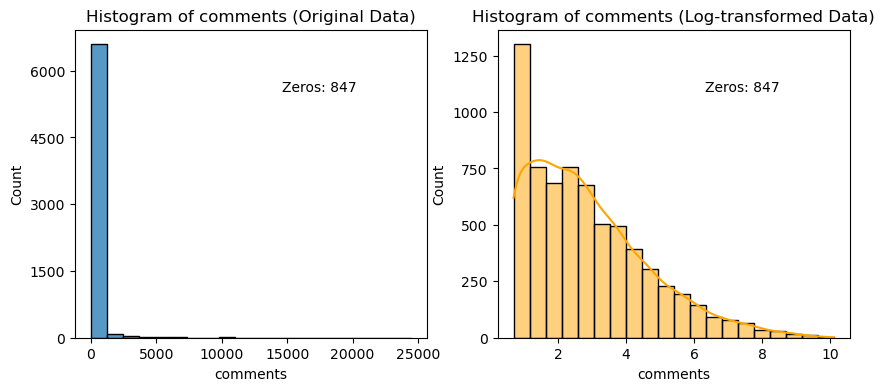

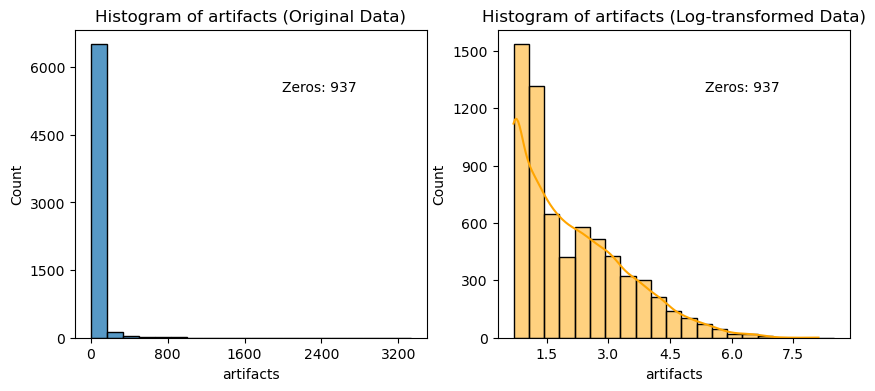

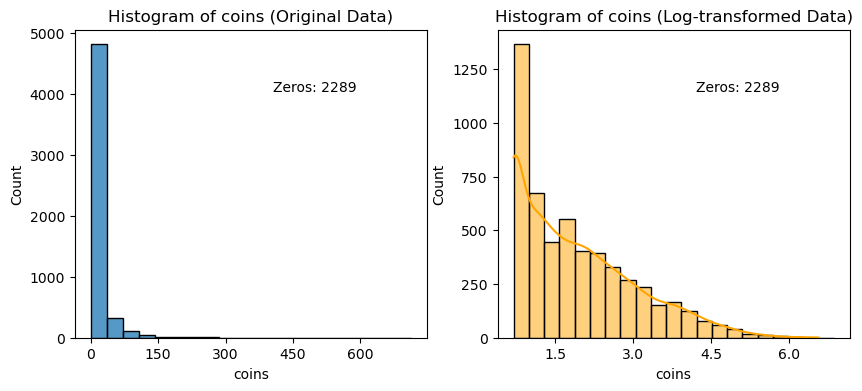

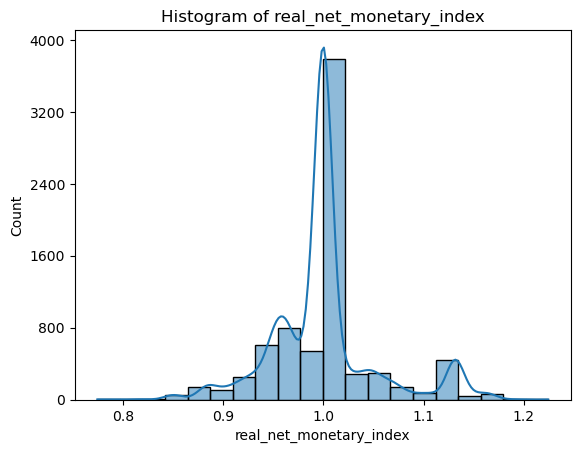

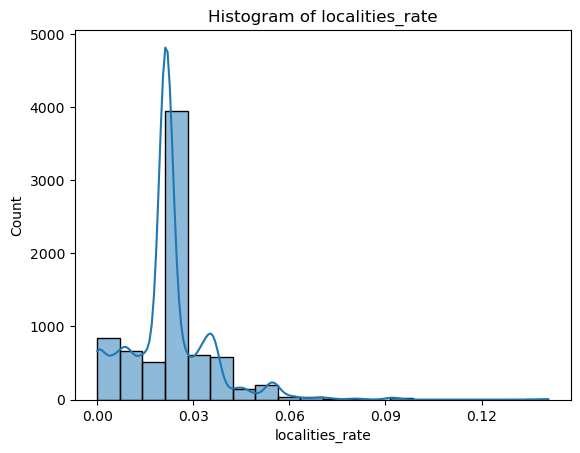

In [13]:
#HISTOGRAMS for the ind. variables (non-dummies):
from functions.S_fctn_plot_histograms import create_histograms_with_zeros

create_histograms_with_zeros(daf_non_reduced_with_none_being_zero, [                        
'experience',                  
'contributions',               
'comments',                    
'artifacts',                   
'coins',                                      
'real_net_monetary_index',                    
'localities_rate'])

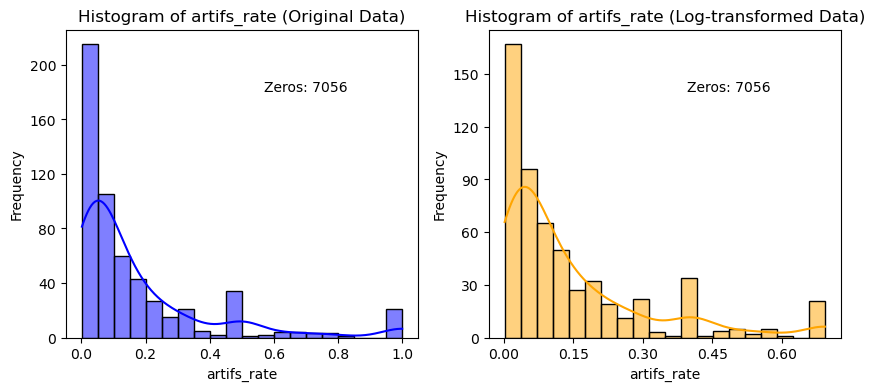

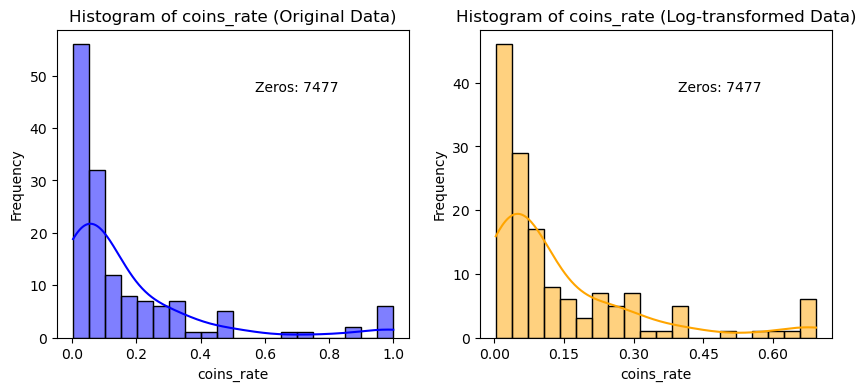

In [14]:

#histograms for the dependent variable with log transformation:
from functions.S_fctn_plot_histograms import generate_histograms_w_log

generate_histograms_w_log(df_log, ['artifs_rate', 'coins_rate'])

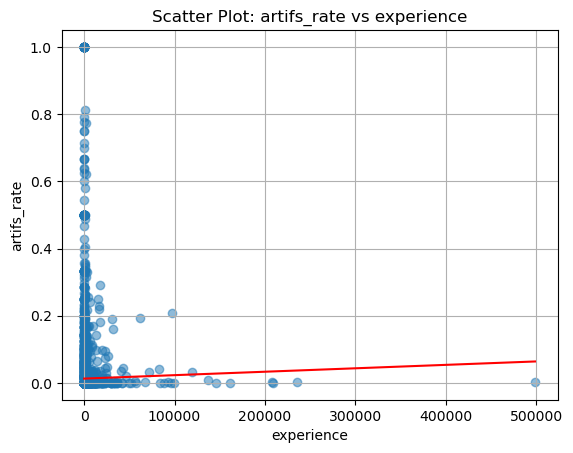

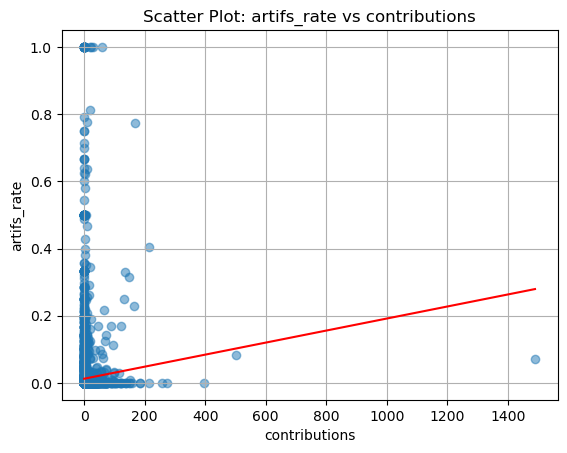

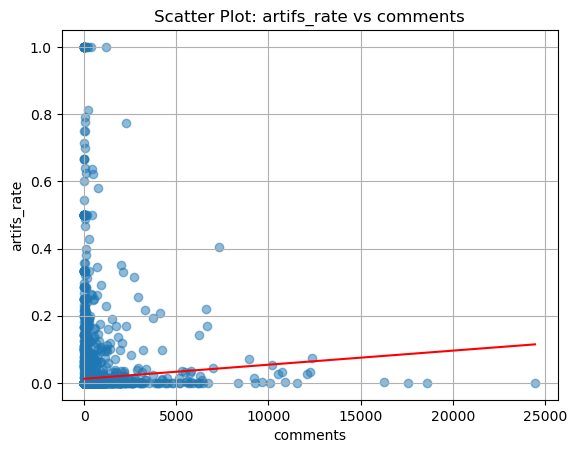

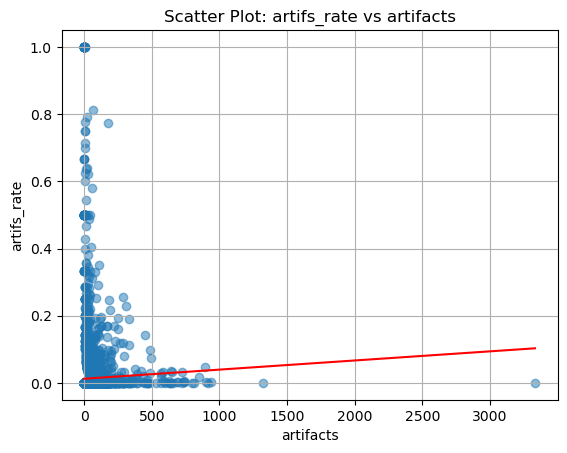

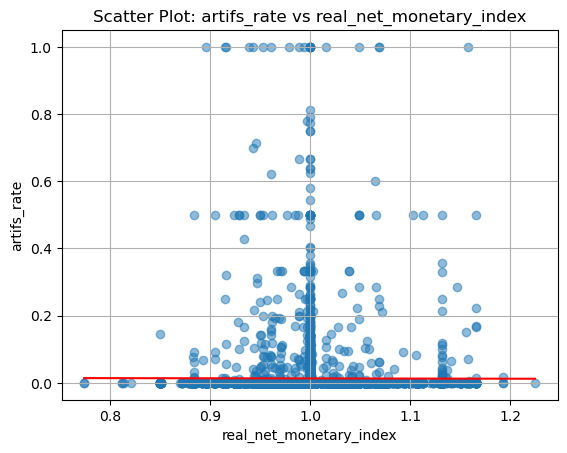

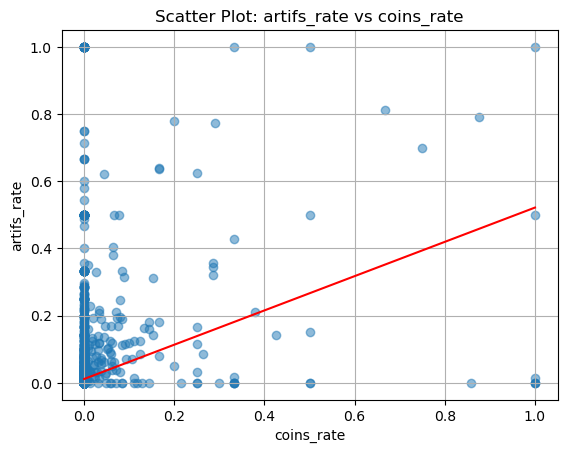

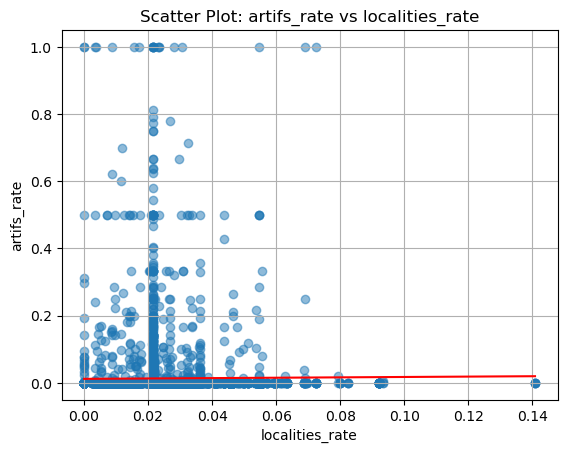

In [15]:
#'PLOT INITIAL SCATTER PLOTS
from functions.Q_fctn_plot_scatter import plot_scatter
plot_scatter(df_log, 'artifs_rate', ['experience', 'contributions',
                                     'comments', 'artifacts',
                                     'real_net_monetary_index', 'coins_rate', 'localities_rate'])

In [16]:
from functions.W_fctn_print_top import print_top_observations

print_top_observations(df_log, columns=[ 'experience','contributions',               
'comments',                    
'artifacts'])

Top 5 observations for column 'experience':
      experience  contributions  comments  artifacts
4216      498425             75     16255        331
4217      235138             20      9632        903
4218      209125            119     17572         77
119       207830             25      3085        735
4219      161310             25      4455        219

Top 5 observations for column 'contributions':
      experience  contributions  comments  artifacts
61           604           1489      8964        125
5252          88            502      2554         61
1580          74            395     24463       3332
4911         225            273      4139          1
4682         506            256      4554         36

Top 5 observations for column 'comments':
      experience  contributions  comments  artifacts
1580          74            395     24463       3332
4221       99725              7     18608         83
4218      209125            119     17572         77
4216      498425 

In [17]:

df_log_2 = df_log.copy()




df_log_2 = df_log_2[df_log_2['experience'] != 498425]
df_log_2 = df_log_2[df_log_2['contributions'] != 1489]
df_log_2 = df_log_2[df_log_2['comments'] != 24463]
df_log_2 = df_log_2[df_log_2['artifacts'] != 3332] #DELETE THE MOST SIGNIFICANT OUTLIERS

df_log_3 = df_log_2.copy()


df_log_2 = df_log_2[df_log_2['artifs_rate'] != 1]  #DELETE THE ONES

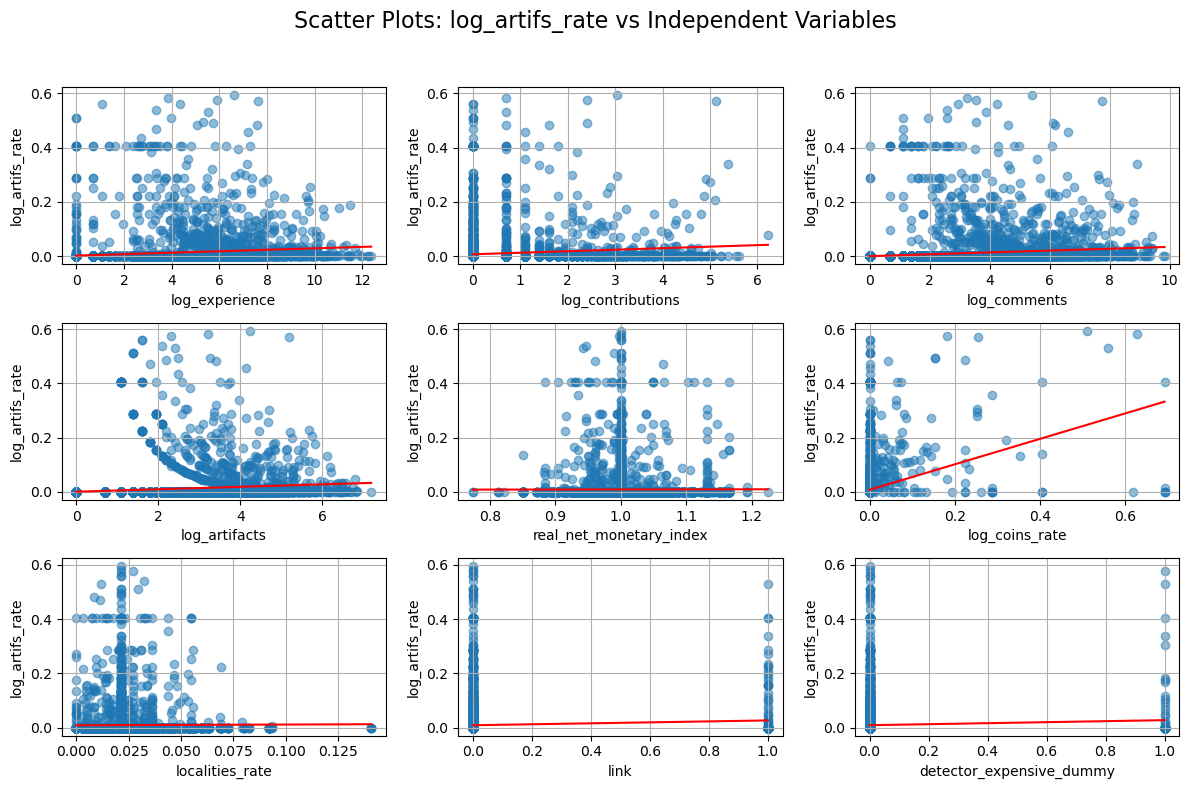

In [18]:
#plot scatter plots after log transform and without outliers:
from functions.Q_fctn_plot_scatter import plot_scatter_all
plot_scatter_all(df_log_2, 'log_artifs_rate', ['log_experience', 'log_contributions', 
                                      'log_comments', 'log_artifacts', 
                                     'real_net_monetary_index', 'log_coins_rate', 'localities_rate','link','detector_expensive_dummy'])

In [19]:
#OLS_REGRESSION:

#!pip install linearmodels


from functions.V_fct_OLS_REGRESSION import ols_regression
#first model, without log transform:
model1 = ols_regression(df_log_2, 'artifs_rate', [ 'experience', 'contributions', 'comments', 'artifacts',
                                      'real_net_monetary_index', 'log_coins_rate', 'localities_rate', 'link', 'residence_additional_info', 'detector_expensive_dummy'])

Regression Summary:
                            OLS Regression Results                            
Dep. Variable:            artifs_rate   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     78.37
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          7.42e-154
Time:                        08:34:51   Log-Likelihood:                 11261.
No. Observations:                7598   AIC:                        -2.250e+04
Df Residuals:                    7587   BIC:                        -2.242e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
co

In [20]:

model2 = ols_regression(df_log_2, 'log_artifs_rate', ['log_experience', 'log_contributions', 
                                     'log_comments', 'log_artifacts',
                                     'real_net_monetary_index', 'log_coins_rate', 'localities_rate','link', 'residence_additional_info', 'detector_expensive_dummy'])



Regression Summary:
                            OLS Regression Results                            
Dep. Variable:        log_artifs_rate   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     86.96
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          1.63e-170
Time:                        08:34:51   Log-Likelihood:                 12770.
No. Observations:                7598   AIC:                        -2.552e+04
Df Residuals:                    7587   BIC:                        -2.544e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
co

In [21]:
from functions.V_fctn_OLS_ROBUST import ols_regression_robust


model2_ROBUST = ols_regression_robust(df_log_2, 'log_artifs_rate', ['log_experience', 'log_contributions', 
                                     'log_comments', 'log_artifacts',
                                     'real_net_monetary_index', 'log_coins_rate', 'localities_rate','link', 'residence_additional_info', 'detector_expensive_dummy'])


Regression Summary:
                            OLS Regression Results                            
Dep. Variable:        log_artifs_rate   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     21.00
Date:                Wed, 09 Aug 2023   Prob (F-statistic):           4.88e-39
Time:                        08:34:51   Log-Likelihood:                 12770.
No. Observations:                7598   AIC:                        -2.552e+04
Df Residuals:                    7587   BIC:                        -2.544e+04
Df Model:                          10                                         
Covariance Type:                  HC1                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
co

In [22]:

from functions.V_fctn_OLS_WLS import ols_regression_wls

model2_WLS = ols_regression_wls(df_log_2, 'log_artifs_rate', ['log_experience', 'log_contributions', 
                                     'log_comments', 'log_artifacts',
                                     'real_net_monetary_index', 'log_coins_rate', 'localities_rate','link', 'residence_additional_info', 'detector_expensive_dummy'])

Regression Summary:
                            WLS Regression Results                            
Dep. Variable:        log_artifs_rate   R-squared:                       0.966
Model:                            WLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                 2.180e+04
Date:                Wed, 09 Aug 2023   Prob (F-statistic):               0.00
Time:                        08:34:52   Log-Likelihood:                 30996.
No. Observations:                7598   AIC:                        -6.197e+04
Df Residuals:                    7587   BIC:                        -6.189e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
co

In [23]:
model2_LPM = ols_regression_robust(df_log_3, 'rate_artifs_dummy', ['log_experience', 'log_contributions', 
                                     'log_comments', 'log_artifacts',
                                     'real_net_monetary_index', 'log_coins_rate', 'localities_rate','link', 'residence_additional_info', 'detector_expensive_dummy'])

Regression Summary:
                            OLS Regression Results                            
Dep. Variable:      rate_artifs_dummy   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     65.29
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          3.35e-128
Time:                        08:34:52   Log-Likelihood:                 170.96
No. Observations:                7619   AIC:                            -319.9
Df Residuals:                    7608   BIC:                            -243.6
Df Model:                          10                                         
Covariance Type:                  HC1                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
co

Optimization terminated successfully.
         Current function value: 0.194088
         Iterations 8


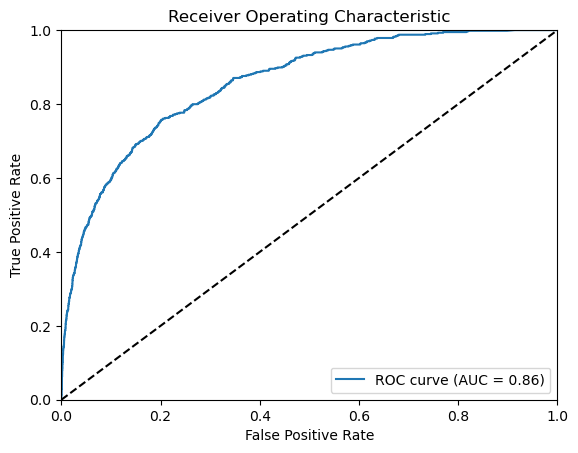

Confusion Matrix:
Predicted     0    1
Actual              
0.0        6997   58
1.0         456  108

Partial Effect At the Average (PEA):
        Logit Marginal Effects       
Dep. Variable:      rate_artifs_dummy
Method:                          dydx
At:                           overall
                               dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
log_experience                0.0067      0.001      4.892      0.000       0.004       0.009
log_contributions             0.0036      0.003      1.289      0.197      -0.002       0.009
log_comments                  0.0085      0.002      3.596      0.000       0.004       0.013
log_artifacts                 0.0276      0.003     10.007      0.000       0.022       0.033
real_net_monetary_index      -0.0152      0.054     -0.280      0.779      -0.121       0.091
log_coins_rate                0.5670      0.069   

In [24]:
from functions.V_fctn_LOGIT import logit_regression_roc_wald
model2_LOGIT = logit_regression_roc_wald(df_log_3, dependent_var='rate_artifs_dummy', independent_vars=['log_experience', 'log_contributions', 
                                     'log_comments', 'log_artifacts',
                                     'real_net_monetary_index', 'log_coins_rate', 'localities_rate','link', 'residence_additional_info', 'detector_expensive_dummy'], 
                                     pev_vars=['real_net_monetary_index', 'detector_expensive_dummy', 'localities_rate'], 
                                     ape_vars=['real_net_monetary_index', 'detector_expensive_dummy', 'localities_rate'],
                                     hypotheses_variables=['real_net_monetary_index', 'detector_expensive_dummy', 'localities_rate'])

Optimization terminated successfully.
         Current function value: 0.193826
         Iterations 7


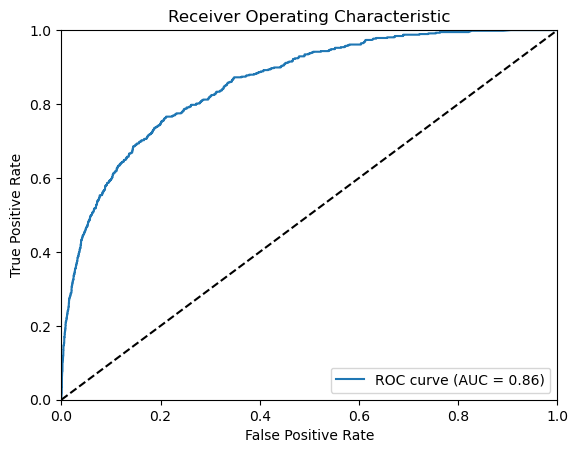

Confusion Matrix:
Predicted     0    1
Actual              
0.0        7008   47
1.0         464  100

Partial Effect At the Average (PEA):
       Probit Marginal Effects       
Dep. Variable:      rate_artifs_dummy
Method:                          dydx
At:                           overall
                               dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
log_experience                0.0071      0.001      5.213      0.000       0.004       0.010
log_contributions             0.0054      0.003      1.785      0.074      -0.001       0.011
log_comments                  0.0072      0.002      3.011      0.003       0.003       0.012
log_artifacts                 0.0288      0.003     10.267      0.000       0.023       0.034
real_net_monetary_index      -0.0173      0.053     -0.327      0.744      -0.121       0.087
log_coins_rate                0.5518      0.058   

In [25]:

#PROBIT:
from functions.V_fctn_PROBIT import probit_regression_roc_wald


model2_PROBIT = probit_regression_roc_wald(df_log_3, dependent_var='rate_artifs_dummy', independent_vars=['log_experience', 'log_contributions', 
                                     'log_comments', 'log_artifacts',
                                     'real_net_monetary_index', 'log_coins_rate', 'localities_rate','link', 'residence_additional_info', 'detector_expensive_dummy'], 
                                      pev_vars=['real_net_monetary_index', 'detector_expensive_dummy', 'localities_rate'], 
                                      ape_vars=['real_net_monetary_index', 'detector_expensive_dummy', 'localities_rate'],
                                      hypotheses_variables=['real_net_monetary_index', 'detector_expensive_dummy', 'localities_rate'])